In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

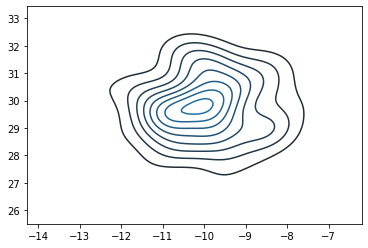

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.6395: 100%|██████████| 6000/6000 [00:22<00:00, 266.67it/s]


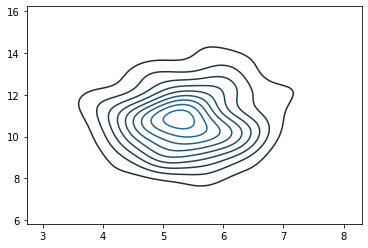

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 5.9264684, 13.907986 ],
             [ 5.6964746,  8.882705 ],
             [ 4.9200015,  9.03928  ],
             [ 5.1823983, 10.803344 ],
             [ 5.71885  , 10.174985 ],
             [ 3.9294307, 11.7319565],
             [ 4.7481885, 10.653414 ],
             [ 4.863986 , 10.960216 ],
             [ 4.8479037, 10.895542 ],
             [ 4.3561573,  9.57456  ],
             [ 4.1049256, 10.026367 ],
             [ 5.0539393, 11.169436 ],
             [ 6.1620736, 10.475641 ],
             [ 5.5301805,  9.311052 ],
             [ 6.1922765, 10.688535 ],
             [ 5.18543  ,  8.566943 ],
             [ 6.483937 , 10.280606 ],
             [ 4.6943946,  9.792233 ],
             [ 5.6271973, 11.781952 ],
             [ 5.412765 , 11.461905 ],
             [ 3.731446 , 11.834565 ],
             [ 5.82787  , 10.535129 ],
             [ 5.9023843, 10.314581 ],
             [ 6.0773625,  9.524949 ],
             [ 5.495022 , 10.380951 ],
             [ 4.306906 ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.GraphicalKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

In [10]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.5883: 100%|██████████| 6000/6000 [00:22<00:00, 267.49it/s]


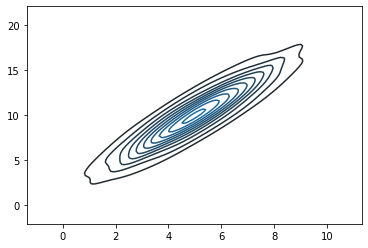

In [11]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])